In [1]:
# This notebook is a study of how data is mapped to another space

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from svm import *

In [3]:
X, y = make_circles(1000, factor=.1, noise=.1)

In [4]:
data = pd.DataFrame(X,y).reset_index()
data.columns = ['y','x1','x2']
data = data[['x1','x2','y']]

### Visualising the data in 2D in original space

<Figure size 432x288 with 0 Axes>

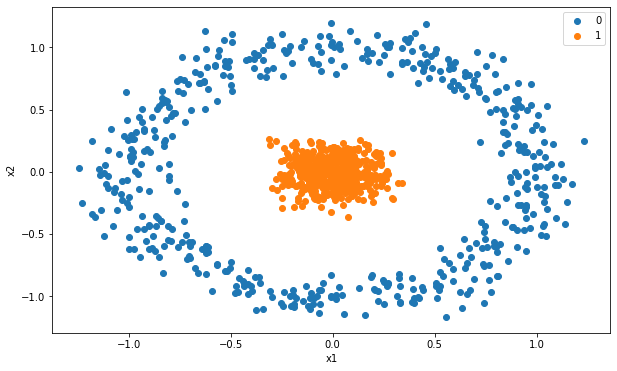

In [5]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
colors = ['b','r']
label = (data['y']).astype(np.int)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
for i in range(len(names)):
    bucket = data[data['y'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

Clearly, there is no seperating linear hyperplane which can classify this data in 2D space.

### Let's draw convex hulls

<Figure size 432x288 with 0 Axes>

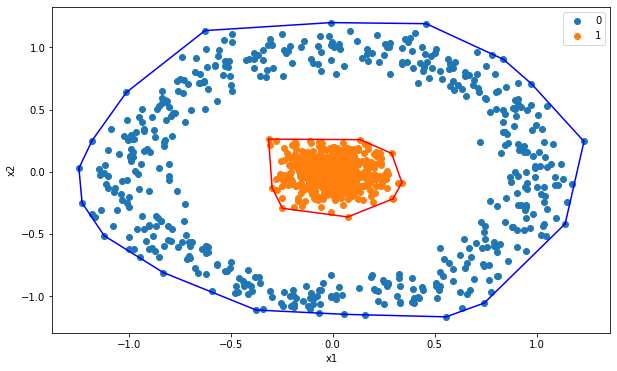

In [22]:
from scipy.spatial import ConvexHull
 
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
label = (data['y']).astype(np.int)
colors = ['b','r']
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
for i in range(len(names)):
    bucket = data[data['y'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])
plt.legend()
plt.show()

Clearly, as one convex hull lies inside other, so, the data is not linearly separable.

Let's verify this by Linear Programming

In [6]:
# used a for loop - for future use, when there will be multiclass classifcation
from scipy.optimize import linprog
 
dic = {0: '0', 1: '1'}
 
for i in dic.keys():
    data["newTarget"] = np.where(data['y'] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = data.iloc[:,[0,1]].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(data.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(data['y'] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of 
    #the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each 
    #inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False})
     
    if res.success:
        print('There is linear separability')
    else:
        print('No linear separability')
    break #remove break in case of multiclass classification 

No linear separability


Let's try to separate the data using SVM

### SVM for data in 2D

In [7]:
# Define our X and Y (Dependent and Target Variables)
x_tr = data.iloc[:, [0,1]].values
y_tr = data.iloc[:,2]

Linear Kernel

In [8]:
# Confusion Matrix for SVM with Linear Kernel
w_best, predicted, tr_acc = driver(x_tr,y_tr)
# svm = SVC(C=1.0, kernel='linear', random_state=0)
# svm.fit(x, y)
 
# predicted = svm.predict(x)

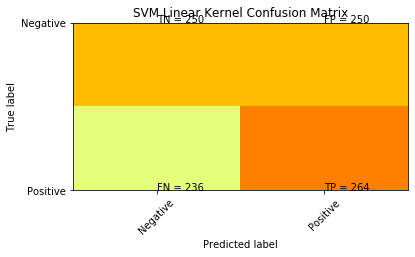

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


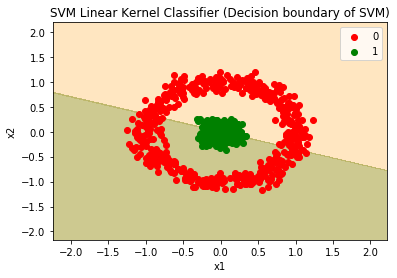

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Linear Kernel Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with Linear Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x_tr, y_tr
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


ravel_arr = np.array([X1.ravel(), X2.ravel()]).T
ravel_preds = get_preds(ravel_arr, w_best)

plt.contourf(X1, X2, np.array(ravel_preds).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel Classifier (Decision boundary of SVM)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

The Linear Kernel could not find a separating hyperplane, as expected.   

### Now, we will try to project this data into another dimension and then check for linear separability

In [10]:
%run func_library.ipynb

In [11]:
funcObj = FunctionLibrary(1) # Declaring a default func object
list_of_functions = [func for func in dir(funcObj) if callable(getattr(funcObj, func)) and not func.startswith("__")]
list_of_functions

['Normx', 'cosx', 'cube', 'expsquare', 'expx', 'sinx', 'subsquare', 'x2_x3']

In [12]:
def transform(x):
    ip = FunctionLibrary(x)
    return getattr(ip, func)()

In [13]:
for func in list_of_functions:

    print('Transforming using',func,'as the transformation function')
    data_copy = data.copy()
    
    data_copy.iloc[:,0:2] = data_copy.iloc[:,0:2].applymap(lambda x: transform(x))
 
    dic = {0: '0', 1: '1'}

    for i in dic.keys():
        data_copy["newTarget"] = np.where(data_copy['y'] == i, 1 , -1)

        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        tmp = data_copy.iloc[:,[0,1]].values
        tmp = sc.fit_transform(tmp)

        xx = np.array(data_copy.newTarget.values.reshape(-1,1) * tmp)
        t = np.where(data_copy['y'] == i, 1 , -1)

        #2-D array which, when matrix-multiplied by x, gives the values of 
        #the upper-bound inequality constraints at x.
        A_ub = np.append(xx, t.reshape(-1,1), 1)

        #1-D array of values representing the upper-bound of each 
        #inequality constraint (row) in A_ub.
        b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)

        # Coefficients of the linear objective function to be minimized.
        c_obj = np.repeat(1, A_ub.shape[1])
        res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                      options={"disp": False})

        if res.success:
            print('There is linear separability')
        else:
            print('No linear separability')
        break #remove break in case of multiclass classification 
    print('-'*80)

Transforming using Normx as the transformation function
No linear separability
--------------------------------------------------------------------------------
Transforming using cosx as the transformation function
There is linear separability
--------------------------------------------------------------------------------
Transforming using cube as the transformation function
No linear separability
--------------------------------------------------------------------------------
Transforming using expsquare as the transformation function
No linear separability
--------------------------------------------------------------------------------
Transforming using expx as the transformation function
No linear separability
--------------------------------------------------------------------------------
Transforming using sinx as the transformation function
No linear separability
--------------------------------------------------------------------------------
Transforming using subsquare as th

#### Thus, we find that this data is separable in cosx dimensional space

#### Let's project it to cosx space

In [14]:
def transform_cosx(x):
    ip = FunctionLibrary(x)
    return getattr(ip, 'cosx')()

In [15]:
data_cos = data.copy()
data_cos.iloc[:,0:2] = data_cos.iloc[:,0:2].applymap(lambda x: transform_cosx(x))

### Visualising the data in 2D in cosx space

<Figure size 432x288 with 0 Axes>

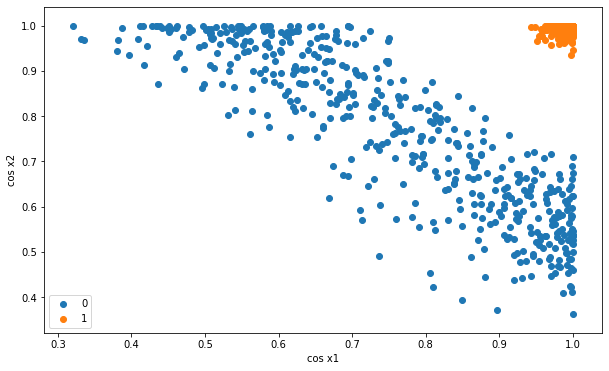

In [60]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
colors = ['b','r']
label = (data_cos['y']).astype(np.int)
plt.xlabel('cos '+data_cos.columns[0])
plt.ylabel('cos '+data_cos.columns[1])
for i in range(len(names)):
    bucket = data_cos[data_cos['y'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

It can be seen that the data is linearly separable in this space.

### Let's draw convex hulls

<Figure size 432x288 with 0 Axes>

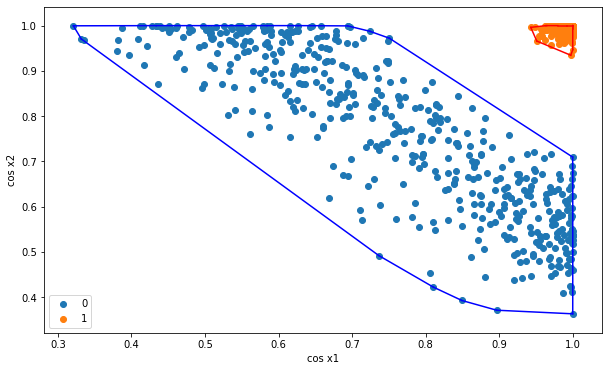

In [61]:
from scipy.spatial import ConvexHull
 
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
label = (data_cos['y']).astype(np.int)
colors = ['b','r']
plt.xlabel('cos '+data_cos.columns[0])
plt.ylabel('cos '+data_cos.columns[1])
for i in range(len(names)):
    bucket = data_cos[data_cos['y'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])
plt.legend()
plt.show()

Clearly, the two convex hulls do not intersect with each other and have no area in common. So, we can say that the dataset is linearly separable in this space.

### SVM for data in 2D in cosx space

In [17]:
# Define our X and Y (Dependent and Target Variables)
x_tr_cos = data_cos.iloc[:, [0,1]].values
y_tr_cos = data_cos.iloc[:,2]

Linear Kernel

In [18]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', random_state=0)
svm.fit(x_tr_cos, y_tr_cos)
 
predicted = svm.predict(x_tr_cos)

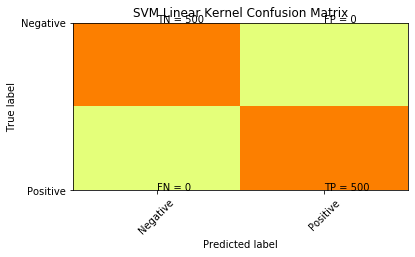

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


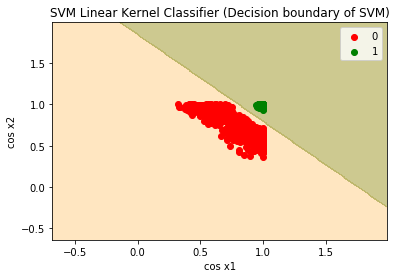

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tr_cos, predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Linear Kernel Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with Linear Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x_tr_cos, y_tr_cos
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel Classifier (Decision boundary of SVM)')
plt.xlabel('cos x1')
plt.ylabel('cos x2')
plt.legend()
plt.show()

### Thus, in cosx space, the dataset is linearly separable

### Plotting cosx function 

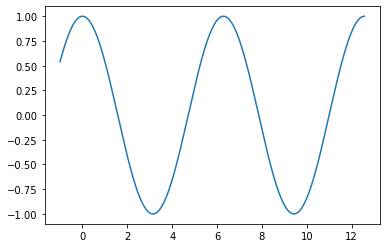

In [63]:
x = np.arange(-1,4*np.pi,0.0001)   # start,stop,step
y = np.cos(x)
plt.plot(x,y)
plt.show()

### Plotting cosx function in range of the data 

In [44]:
mins = data.min(axis=0)
maxs = data.max(axis=0)

x1_min = mins['x1']
x2_min = mins['x2']
x1_max = maxs['x1']
x2_max = maxs['x2']

In [46]:
x1_min, x2_min, x1_max, x2_max

(-1.2440100934389888,
 -1.1676281441469114,
 1.232619134887446,
 1.1995595233807959)

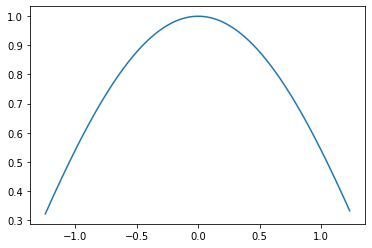

In [66]:
x = np.arange(min(x1_min,x2_min),max(x1_max,x2_max),0.0001)   # start,stop,step
y = np.cos(x)
plt.plot(x,y)
plt.show()

#### Let's make this transformation function to be piecewise defined by approximating 5 linear lines which will be generated by using the crosstalk phenomena of two wires.

In [69]:
def deriv(f,x):

    h = 0.000000001                 #step-size 
    return (f(x+h) - f(x))/h        #definition of derivative

In [81]:
def f1(x):
    return np.cos(x)

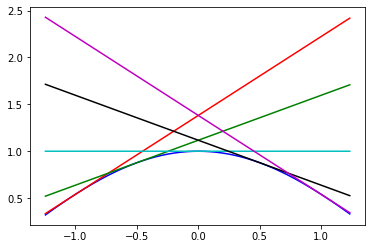

In [89]:
x = np.arange(min(x1_min,x2_min),max(x1_max,x2_max),0.0001)   # start,stop,step
y = f1(x)
plt.plot(x,y,'b-')

# Tangent at x = -1
x_1 = -1
y_1 = f1(x_1)
y_tan_1 = deriv(f1,x_1) * (x - x_1) + y_1
plt.plot(x,y_tan_1,'r-')

# Tangent at x = -0.5
x_2 = -0.5
y_2 = f1(x_2)
y_tan_2 = deriv(f1,x_2) * (x - x_2) + y_2
plt.plot(x,y_tan_2,'g-')

# Tangent at x = 0
x_3 = 0
y_3 = f1(x_3)
y_tan_3 = deriv(f1,x_3) * (x - x_3) + y_3
plt.plot(x,y_tan_3,'c-')

# Tangent at x = 0.5
x_4 = 0.5
y_4 = f1(x_4)
y_tan_4 = deriv(f1,x_4) * (x - x_4) + y_4
plt.plot(x,y_tan_4,'k-')

# Tangent at x = 1
x_5 = 1
y_5 = f1(x_5)
y_tan_5 = deriv(f1,x_5) * (x - x_5) + y_5
plt.plot(x,y_tan_5,'m-')

plt.show()

### For the interpretation of this result and how the piecewise func approximation is related to crosstalk, please refer to the pdf report.